# Using Python to Visualize Harris’s Hawk Group Size Distribution
By: Brooke Poplin

# Abstract

 
The objective of this project is to generate a python script wherein the impact of developed land on Harris's Hawk group size is able to be visualized and evaluated using a model. In the last ten years, it has been observed by Clark 2017 and Gibbons 2021 that the south Texas Harris's Hawk population has been rapidly expanding from natural thorn scrub habitat into highly urban areas. For my master's research at the university of North Texas, I am examining how habitat can influence the social behavior of these hawks. Using Python programming, a publication-ready map of the Harris's Hawk average group size in the wintertime distribution was generated using the matplotlib and geopandas packages. Following this, I examined the statistical impact of imperviousness, year, and season on group size by running a linear mixed-effects model with group name as the grouping variable. This model showed that all three variables significantly impacted group size of Harris's Hawks. The statsmodels package allowed the generation and summarization of this model. The variable of interest was imperviousness as it is a proxy for urbanization, and therefore I generated two figures showing the relationship between the data points. One figure was made using matplotlib, and the other was made using seaborn to better visualize confidence intervals. Using Python to accomplish these deliverables made the project much quicker, allowed the script to be in all one location for each deliverable related to the project, and I can rely on the information to be accurate to the data input that I gave it. Previously these tasks have been accomplished in ArcGIS Pro and Rstudio, and Python provided the same results in a much quicker and more efficient timeframe.

# Introduction
hat is your project objective? Describe the task you intend to accomplish using Python
– how your proposed solution will make the task easier, faster, and/or more accurate
– why your task could not simply be accomplished using the “out-of-the-box” tools (e.g.,
from ArcGIS/QGIS), or why your script gives a particular advantage over those tools
(e.g., iterations or conditionals are required)
• What do you plan to do?

This domination of the landscape by humans can cause animals to adapt to the changing landscape and exploit human activities to their advantage, however. Raptors are a popular example of this. Raptors have been documented extensively to persist in urban areas by taking advantage of abundant urban prey such as rats, (Ratus spp.), abundant urban bird species such as rock pigeons (Columba livia), and even bats (Herbert and Herbert 1965, Hindmarch 2015, Ortega-Álvarez and Calderón-Parra 2014). Various raptor species have adapted their nesting behavior to vegetation found more abundantly in anthropogenic areas such as backyard trees and human-built structures like within barns and on roofs (Chase and Walsh 2006, Hays 2000, Septon et al. 1996, Stout et al. 2006). However, there is little known about how this may affect behavior in raptors, specifically sociality. 
14% of raptor species have been reported to display cooperative breeding behaviors (Kimball et al. 2003). Harris’s Hawks (Parabuteo unicinctus) are nonmigratory group-living hawks and are most commonly found in the southwestern portion of the United States and throughout Mexico (Sauer et al. 2019). They have been reported to form groups of 2-7 individuals. Benefits of this social behavior include increased territory defense, provisioning of nestlings, delayed dispersal of offspring for up to 12 months, and cooperative hunting to pursue large prey (Bednarz 1988, Dawson and Mannan 1991, Gibbons 2021, Kimball et al. 2003.)

The group-forming behavior of the Texas population of Harris’s Hawks was long believed to be exploited uncommonly, with literature reporting the majority of groups consisting of a breeding pair (Brannon 1980, Griffin 1976). However, in a survey study completed in 2015, Clark 2017 concluded the average group size was 2.58 birds per group, with 56% of groups consisting of three or more hawks. The perceived benefit of cooperative hunting behavior in this population is not commonly exploited (Gibbons 2021, Poplin per. Observation). Additionally, Hagler 2022 found that the most common prey item taken was small rodents and birds, which did not support conclusions made by Bednarz 1988 suggesting that the primary driving force for Harris's Hawk sociality was cooperative hunting. Despite this, there is a large population of social Harris’s Hawks in south Texas – specifically in the lower Rio Grande Valley, therefore the driving force, or forces, for their social behavior is still unclear. Further, observations of Harris’s Hawks living in urban areas of the RGV (in cities such as McAllen, Brownsville, and Harlingen, Texas) forming groups and displaying social behavior prompts the question of: how does living in areas with high anthropogenic activity impact Harris’s Hawk group-forming behavior?

The Rio Grande Valley (RGV), due to its lack of extreme variability in temperatures and subtropical environment, is an important place for conservation of multiple declining species found in southern Texas including the Harris’s Hawk, Ocelot (Leopardus pardalis), and the Texas horned lizard (Phrynosoma cornutum). Harris’s Hawks living in the urban areas within the lower RGV have been documented to nest on billboards, backyard trees of residents, and on power poles (Gibbons 2021, Poplin unpubl. data). It is apparent that the urban landscape has changed their nesting and foraging behaviors, but our goal is to begin to understand the impact this has on their sociality.

I aim to further investigate this  by investigating the effects of habitat type on the group size of 70 identified groups of Harris’s Hawks throughout south Texas. I hypothesize that, per the dual benefits framework proposed by Shen et al. 2017, social group size may differ with urbanization as sociality can provide different survival strategies that may be best exploited under varying conditions. Imperviousness was chosen as my method of quantifying urbanization due to its ability to be analyzed quantitatively due to discrete measurability and reliability as a measure of ecological footprint by human activity (Sutton et al. 2009). 

Using Python programming and the libraries made available, the average group size of 70 different groups that have been previously censused in the winter can be averaged and mapped out in comparison to developed land. This will allow visualization of the distribution of groups to go along with publications generated from my master's thesis as well as exploratory data analysis to begin to understand any trends. This task can be completed with ArcGIS pro, however, with python library geopandas and matplotlib, the process can be streamlined to commands given explicitly via lines of code to achieve the end product rather than manually loading tools and carrying out processes in the GIS software. Python programming is also much faster, and will allow the map's appearance changes to be made by altering the code and running the command. 

Using a previous dataset, Python can use the library statsmodels to run the summary of a linear-mixed effects model to evaluate the impact of variables on group size. This is a model where percent imperviousness, year, and season were treated as the predictors, and the group size within a particular season are the response variable. Group ID can be used as the grouping variable to control for multiple census observations of the same group of hawks. This task can be completed in Rstudio, however the model generation requires more complicated coding in contrast with the ease provided by the materials in the statsmodels package in Python. Further, is is quite useful to pair the code for the model with the generated map, allowing the entire analysis to exist in one script with results interpreted. Once the model is generated, the relationship between the variable of interest, imperviousness, and groupsize will be plotted with a trendline and confidence intervals using matplotlib and seaborn

# Anticipated Deliverables
1. A publication-ready map of Harris's Hawk group size distribution
2. Statistical analysis using a linear-mixed effects model
3. Figure of the plot of relationship between imperviousness and groupsize

### Step One: Load Packages
packages required to complete the proposed deliverables

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Pandas: data manipulation and analysis
# Geopandas: extension of pandas intended to manipulate and analyze geographic data
# Numpy: scientific computing
# Matplotlib: 2D plotting library
# Statsmodels: useful for generating models
# Seaborn: additional data visualization library for statistical plots


### Step Two: Load Shapefiles
I have previously acquired the shapefile of my study area as well as extracted developed land within the study area from Esri NLCD dataset 2021. These will be used to generate the map

In [3]:
counties = gpd.read_file("studyarea.shp")
#shapefile of study area - 3 counties Hidalgo, Willacy, and Cameron county.
developedland = gpd.read_file("developedland.shp")
#shapefile of impervious land within the bounds of study area. 
    #This is a giant file and takes forever to load

### Step Three: Load Harris's Hawk Group Location and Size Data
This is the dataset I have been working with for my analysis on Harris's hawk habitat. 

In [4]:
df = pd.read_csv("GROUPSIZEBACKUP12.csv")
#use pandas to convert the csv to a dataset
df.dropna()
#drop any rows with blank cells
df.head()
#load the head of the map to ensure the variables were uploaded correctly

,Groups,class,Season,Year,Value,Imperviousness,majority,wetland,Lat,Long
0,CCR sniper tower,Natural,Summer,2023,3,0.10,shrub/scrub,not,26.007026,-97.482157
1,Unit 1,natural,Summer,2020,2,0.13,shrub/scrub,not,26.007026,-97.482157
2,Unit 1,natural,Summer,2020,2,0.13,shrub/scrub,not,26.007026,-97.482157
3,Unit 1,natural,Winter,2020,2,0.13,shrub/scrub,not,26.201000,-97.418000
4,Unit 1,natural,Summer,2019,3,0.13,shrub/scrub,not,26.151000,-97.950000


In [5]:
#view the whole dataframe
df

,Groups,class,Season,Year,Value,Imperviousness,majority,wetland,Lat,Long
0,CCR sniper tower,Natural,Summer,2023,3,0.10,shrub/scrub,not,26.007026,-97.482157
1,Unit 1,natural,Summer,2020,2,0.13,shrub/scrub,not,26.007026,-97.482157
2,Unit 1,natural,Summer,2020,2,0.13,shrub/scrub,not,26.007026,-97.482157
3,Unit 1,natural,Winter,2020,2,0.13,shrub/scrub,not,26.201000,-97.418000
4,Unit 1,natural,Summer,2019,3,0.13,shrub/scrub,not,26.151000,-97.950000
...,...,...,...,...,...,...,...,...,...,...
359,Ware/MNC,natural,Summer,2018,2,59.22,developed land,not,25.929000,-97.363000
360,Ware/MNC,natural,Winter,2019,2,59.22,developed land,not,26.101667,-97.715000
361,Ware/MNC,natural,Summer,2019,3,59.22,developed land,not,26.101667,-97.715000
362,Ware/MNC,natural,Summer,2020,2,59.28,developed land,not,26.101667,-97.715000


### Step Four: Manipulate df for map by grouping by average group size across winter seasons
For the map, only one value per location needs to be expressed. Harris's Hawk groups are significantly larger in the winter time, and I have data from 2018 to 2023 of group size of different groups. Taking the average size for each group name and making this the value will allow for visualization of the group size over time in the map.

In [6]:
df1 = df[df['Season'] == 'Winter']
#make a new dataframe where the rows containing summer are filtered out
df2 = df1.groupby(by='Groups')[['Value','Lat','Long']].mean()
#for each group, take the mean of the variables. The mean of value is
    #most impoertant.
#taking the mean of lat and long won't change the value because
    #it is the same for every year per group
df2.dropna()
#drop any rows that have no data
df2.head()
#see the top part of this df to ensure everything loaded correctly

,Value,Lat,Long
Groups,,,
1847,3.000000,25.9640,-97.2150
2.5MileW,3.666667,26.2040,-98.0380
509 and I69 E,4.000000,26.2350,-97.5900
511 Highway,2.400000,26.1066,-97.4692
Airport,2.000000,25.9590,-97.2870


### Step Five: Using iteration to make Geodataframe from df2
I am using the shapely geometry to convert the latitude and longitude columns into points that can be plotted onto the map using geopandas.

In [7]:
from shapely.geometry import Point
#point is a class in shapely that represents a location
geometry = [Point(xy) for xy in zip(df2['Long'], df2['Lat'])]
#iterates through the lon and lat columns in df2 and creates
    #an xy point for each of them
points = gpd.GeoDataFrame(df2, geometry=geometry,crs="EPSG:4326")
#create the geodataframe. To ensure it is saved in WGS 84, use
    #EPSG:4326

# Project Design
How do you divide and conquer? What are the components comprising the project and how
do you plan to tackle each?
• What external packages do you plan to use and why? What functions or classes are you going
to write?

# Results and Discussion

### Step Six: Plot the Two Shapefiles and the Geodataframe of Points
Use matplotlib to plot the two shapefiles created and then plot the points geodataframe on the top of them. The map can then be customized using different python commands

Text(0.5, 1.0, 'South Texas HRSH Group Sizes')

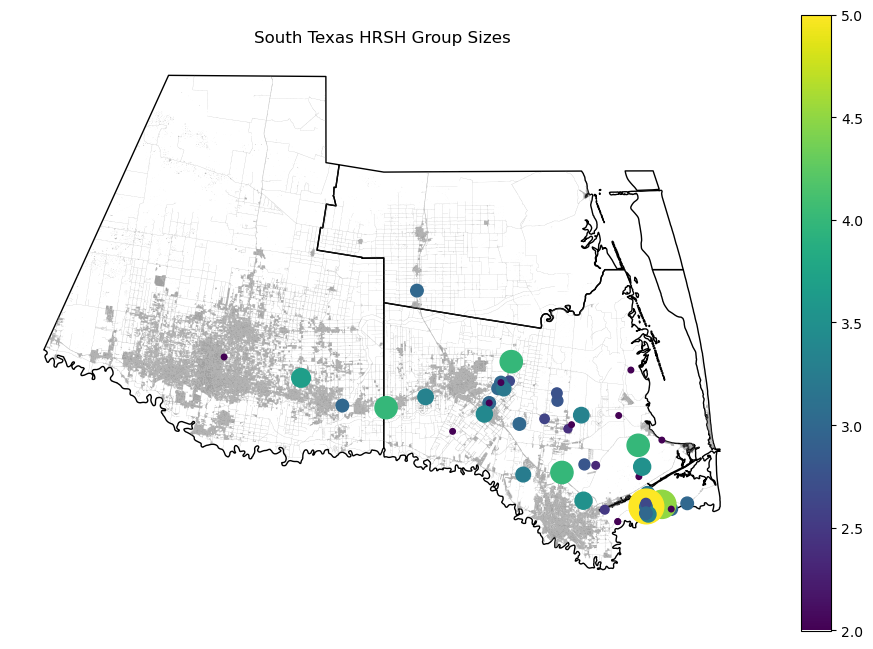

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
#make empty 12" x 8" plot 
#name it ax
counties.plot(ax=ax, color='none', edgecolor='black')
#plot counties shapefile onto ax with no coloration and black edges
developedland.plot(ax=ax, color='gray', alpha=0.75)
#plot developedland shapefile onto ax with gray coloring and 75%
    #transparency
points.plot("Value", ax=ax, legend=True, cmap="viridis", markersize=(df2['Value']**4))
#take the points gdf, and using the value column, plot the points with a corresponding
    #point size and color. The cmap function allows the points to be colored based
    #on value size, and legend= TRUE adds the color legend for cmap.
ax.set_axis_off();
#turns off x and y axis for map
ax.set_title('South Texas HRSH Group Sizes')
#adds the title. I cannot put "Harris's Hawks" because python won't let me
    #use an apostrophe, so the alpha code HRSH is a standin.

### Step Seven: Data manipulation for Linear Mixed-effects Regression
Allows the columns to be read so the effect on the response variable can be best analyzed

In [9]:
df = pd.read_csv("GROUPSIZEBACKUP12.csv")
#read the df again
df.dropna()
#drop na again

df = df.drop(columns = ['Lat', 'Long'])
#drop lat and long variables


df['Season'].replace(['Winter', 'Summer'],
                        [1, 2], inplace=True)
#need to convert season to a factor instead of a character for multiple regression

df['Year'].replace(['2018', '2019','2020', '2021', '2022', '2023'],
                        [1, 2, 3, 4, 5, 6], inplace=True)
#need to convert year to a factor instead of number

df.corr(numeric_only=True)
#data visualization to ensure that two variables are not correlated
    #enough to inflate the variance. under 25% is okay.

,Season,Year,Value,Imperviousness
Season,1.000000,-0.014664,-0.217595,0.029350
Year,-0.014664,1.000000,0.185681,-0.057544
Value,-0.217595,0.185681,1.000000,-0.161216
Imperviousness,0.029350,-0.057544,-0.161216,1.000000


### Step Eight: Run the Model and Get Results

In [18]:
import statsmodels.formula.api as smf
#get the additional formulas from the libraries

#run lmer
model = smf.mixedlm("Value ~ Imperviousness + Season + Year", df, groups=df["Groups"])
#mixed linear effects model using the df datadrame and grouping variable of
    #group ID
results = model.fit()
#fit the model to an object named results
results.summary()
#show the analysis of the model results

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   Value    
No. Observations:     364       Method:               REML     
No. Groups:           75        Scale:                0.7587   
Min. group size:      1         Log-Likelihood:       -496.2466
Max. group size:      14        Converged:            Yes      
Mean group size:      4.9                                      
---------------------------------------------------------------
                Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
---------------------------------------------------------------
Intercept      -217.872   57.210 -3.808 0.000 -330.002 -105.743
Imperviousness   -0.010    0.005 -2.208 0.027   -0.019   -0.001
Season           -0.404    0.097 -4.151 0.000   -0.595   -0.213
Year              0.110    0.028  3.869 0.000    0.054    0.165
Group Var         0.144    0.085                               
===============================================================

"""

#### the results indicate imperviousness's affect on groupsize (value) is statistically significant
##### It also indicates that year and season significantly impact the results.

### Step Nine: Generate Plots of Relationship Between Imperviousness and Groupsize using matplotlib
These plots can be used in publications for visualization of the relationship between the variables

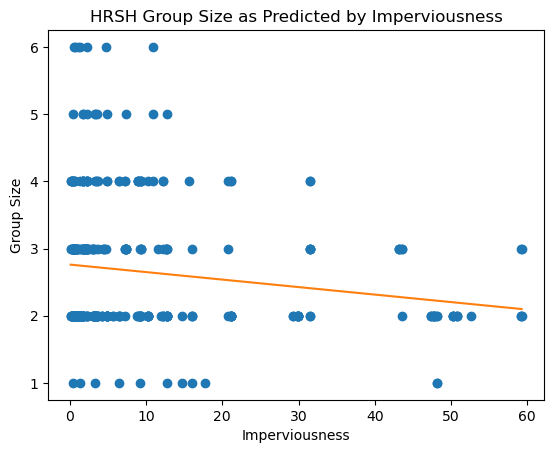

In [14]:
plt.plot(df['Imperviousness'], df['Value'], 'o')
#add points

m, b = np.polyfit(df['Imperviousness'], df['Value'], 1)
#obtain m (slope) and b(intercept) of linear regression line using numpy

 
plt.plot(df['Imperviousness'], m*df['Imperviousness']+b)
#add linear regression line to scatterplot. y=mx+b
plt.xlabel('Imperviousness')
plt.ylabel('Group Size')
plt.title('HRSH Group Size as Predicted by Imperviousness')
plt.show()

### Step Ten: Use Seaborn to Generate an Additional Graph of Results with Confidence Intervals

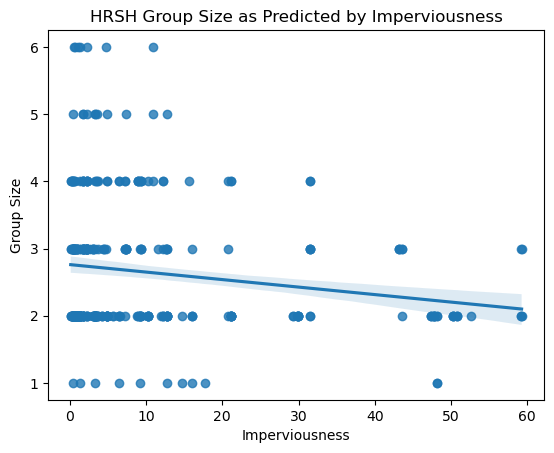

In [15]:
#create scatterplot with regression line
sns.regplot(x='Imperviousness', y='Value', data=df)
plt.xlabel('Imperviousness')
plt.ylabel('Group Size')
plt.title('HRSH Group Size as Predicted by Imperviousness')
plt.show()

## Discussion and Conclusion
Group size data show that Harris’s Hawk groups in areas with a high amount of impervious land present are significantly smaller than those in areas with little impervious land. Small groups are primarily taking advantage of urban areas and larger groups persist where there is more natural terrain. This group size varies significantly with season, with spring and summer group sizes being smaller on average and winter season yielding larger group sizes. These results suggest seasonality and habitat selection affect determining the average group size of Harris’s Hawks in south Texas.

We hypothesize, based on these results, that Harris’s Hawks with larger group sizes may be better able to defend natural territories where there is wetland land cover for finding prey and little human disturbance. Small groups, as a result of ecological constraints and lack of suitable habitat, then can find territories in urban areas where there is prey and nesting substrates but are more prone to human activity (Emlen 1982).
    
Future research will focus on obtaining quantitative and qualitative data on Harris’s Hawks in south Texas across a gradient of habitats and seasonality to measure sociality and conclude how behavior may differ between highly impervious and natural territories. In addition, home range analysis on Harris’s Hawk groups can reveal how they use the surrounding territory to forage and how this compares with social group size.

The efficiency of this project was facilitated by Python programming. Python allowed generation of the map to be streamlined and saved easily into one file, it was much easier to add the visual aspects using geopandas and matplotlib to make a visually interesting map, and python generated a publication ready figure in a few chunks of code where all progress is recorded and saved vs making edits in ArcGIS where progress can be hard to track. For the model generation and fitting, Python allowed the model to be made and fitted with just two lines of code, and analysis to be displayed in an efficient and easy to read manner. Using 2D visualization plotting in the seaborn library, a figure depicting the relationship between group size and imperviousness was able to be generated with confidence intervals.

## References

Bednarz, J. C. (1988). Cooperative Hunting in Harris’s Hawks (Parabuteo unicinctus). Science 239:1525– 1527.

Brannon, J. D. (1980). The reproductive ecology of a Texas Harris' Hawk (Parabuteo unicinctus harrisi) population. Thesis. University of Texas, Austin.

Chace, J. F., & Walsh, J. J. (2006). Urban effects on native avifauna: A review. Landscape and Urban Planning, 74, 46-69.

Clark, W. S. (2017). Group Size of Harris's Hawks (Parabuteo unicinctus) in South Texas. The Wilson Journal of Ornithology, 129(2), 364–368. 

Dawson, J. W., and Mannan, W. R. (1991). Dominance Hierarchies and Helper Contribution in Harris’ Hawks. Auk 108:649–660.

Emlen, S. T. (1982). The Evolution of Helping. I. An ecological constraints model. American Naturalist 119: 29– 39.

Gibbons, A.L. (2021). Sociality in Harris’s Hawks Revisited. [Master’s thesis, University of North Texas Department of Biological Sciences]

Griffin, C. R. (1976). A preliminary comparison of Texas and Arizona Harris' Hawk (Parabuteo unicinctus) populations. Raptor Research, 10, 50.

Hagler, S.J., Gibbons, A., Bednarz, J.C., Clark, W.S., Bonter, D.N. (2022). Nest Provisioning and Sociality at Harris's Hawk Nests In South Texas. Journal of Raptor Research 56:161-170

Hays, J. L. 2000. Red-shouldered Hawks nesting on human-made structures in southwest Ohio. Pp. 469-471 in Raptors at risk: proceedings of the Fifth World Conference on Birds of Prey and Owls (R. D. Chancellor and B.-U. Meyburg, Eds.). World Working Group on Birds of Prey, Berlin, Germany, and Hancock House Publishers,Surrey, British Columbia, Canada

Herbert, R. A., & Herbert, K. G. S. (1965). Behavior of Peregrine Falcons in the New York City Region. The Auk, 82(1), 62–94.

Hindmarch, S., & Elliott, J. E. (2015). When Owls Go to Town: The Diet of Urban Barred Owls. Journal of Raptor Research, 49, 66-74.

Kimball, R. T., Parker, P. G., & Bednarz, J. C. (2003). Occurrence and evolution of cooperative breeding among the diurnal raptors (Accipitridae and Falconidae). The Auk, 120(3), 717–729. 

Ortega-Álvarez, R., & Calderón-Parra, R. (2014). Hunting the unexpected: Harris's Hawks (Parabuteo unicinctus) preying on bats in a Neotropical megacity. Revista Brasileira de Ornitologia, 22, 297-299. 

Sauer, J. R., Niven, D. K., Hines, J. E., Ziolkowski, Jr, D. J., Pardieck, K. L., Fallon, J. E., & Link, W. A. (2019). The North American Breeding Bird Survey, Results and Analysis 1966 – 2019.

Shen, S.-F., Emlen, S. T., Koenig, W. D., & Rubenstein, D. R. (2017). The ecology of cooperative breeding behavior. Ecology Letters.

Stout, W. E., Temple, S. A., & Cary, J. R. (2006). Landscape Features of Red-tailed Hawk Nesting Habitat in an Urban/Suburban Environment. Journal of Raptor Research, 40(3), 181-192.

Sutton, P. C., Anderson, S. J., Elvidge, C. D., Tuttle, B. T., & Ghosh, T. (2009). Paving the planet: impervious surface as proxy measure of the human ecological footprint. Progress in Physical Geography: Earth and Environment, 33(4), 510–527.